In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model

/home/copperma/anaconda3/envs/celltraj_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Tmatrix=np.loadtxt('example_Tmatrix.dat')

In [66]:
w,v=model.get_H_eigs(Tmatrix)

In [43]:
ncomp=200
vkin=model.get_motifs(v,ncomp,w=w)

In [44]:
x_clusters=model.get_landscape_coords_umap(vkin)

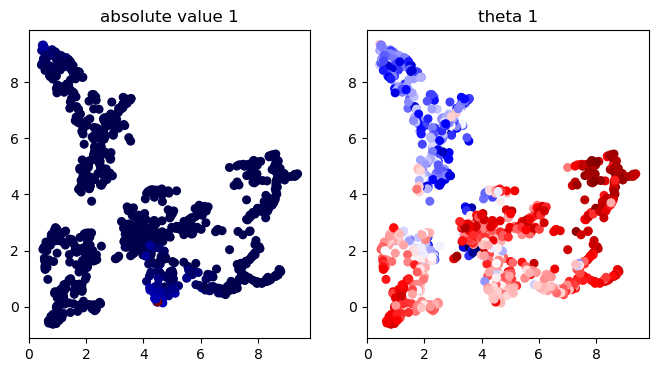

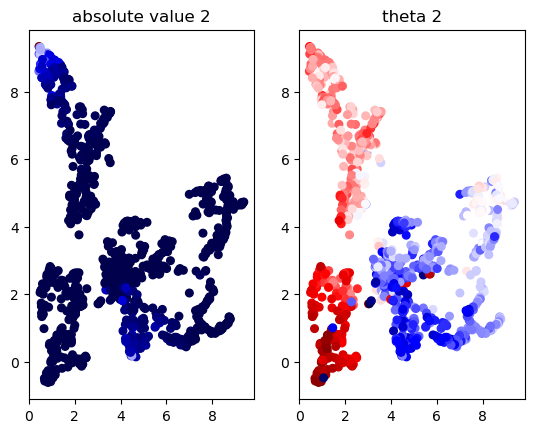

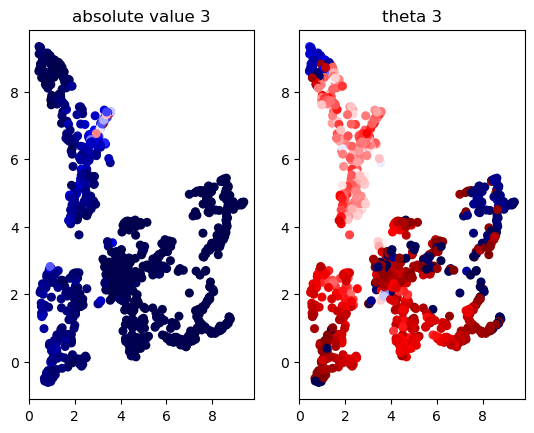

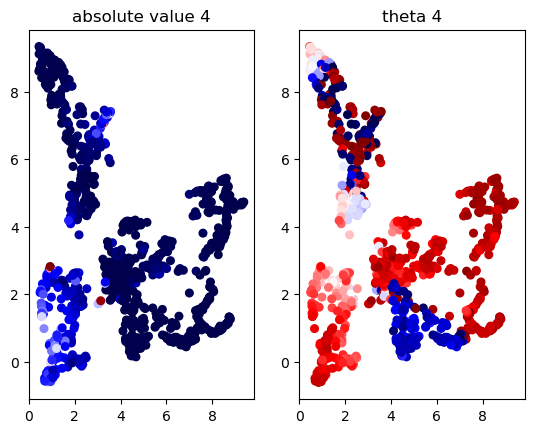

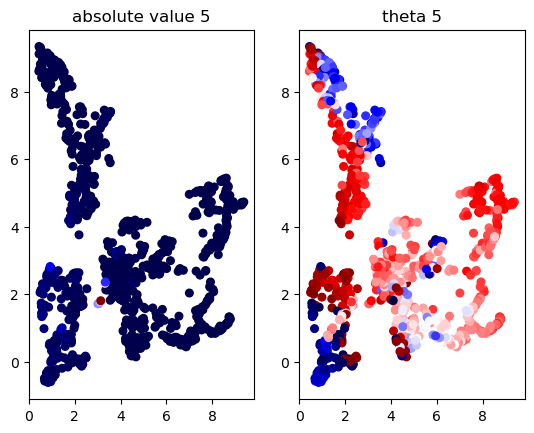

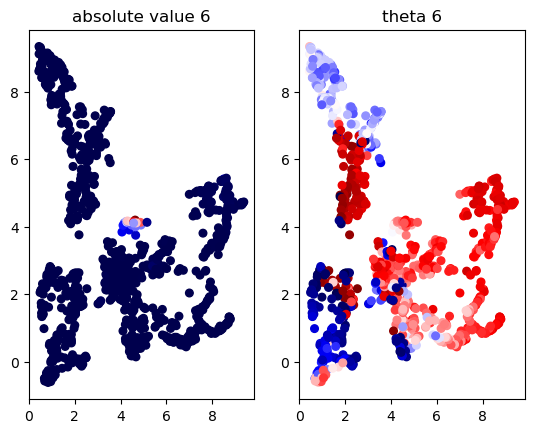

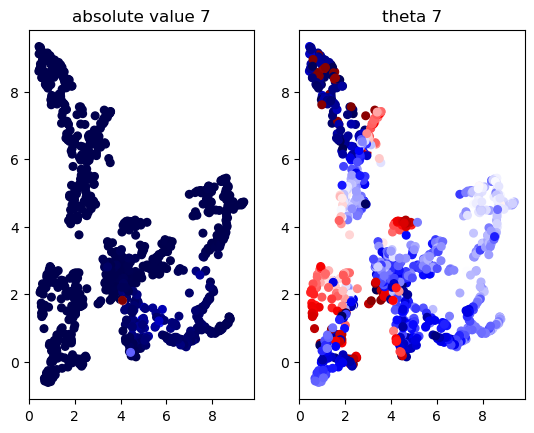

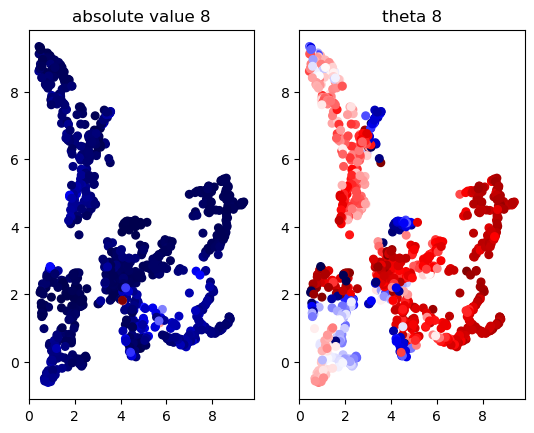

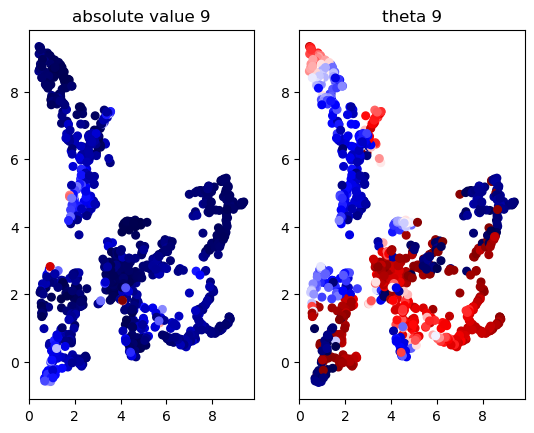

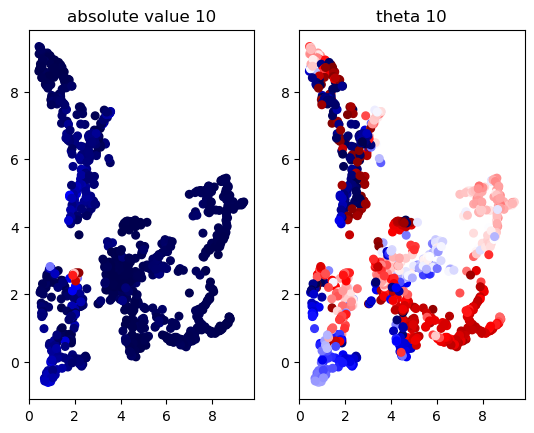

In [45]:
model.plot_eig(v,x_clusters,10)

In [46]:
nstates=15
stateSet=model.get_kineticstates(vkin,nstates)

[0.00101833 0.00101833 0.00101833 0.00203666 0.00305499 0.00814664
 0.01323829 0.01832994 0.05600815 0.05702648 0.06211813 0.10285132
 0.10794297 0.13136456 0.43482688]
15 states initial, 9 states final
[0.00101833 0.00101833 0.00101833 0.00203666 0.00203666 0.00916497
 0.01425662 0.01832994 0.03767821 0.04786151 0.04786151 0.08553971
 0.09979633 0.1395112  0.15173116 0.34114053]
16 states initial, 10 states final
[0.00101833 0.00101833 0.00203666 0.00203666 0.00305499 0.01629328
 0.01731161 0.02851324 0.03665988 0.03767821 0.04480652 0.04786151
 0.06008147 0.07331976 0.09674134 0.10997963 0.42158859]
17 states initial, 12 states final
[0.00101833 0.00101833 0.00101833 0.00407332 0.00407332 0.00509165
 0.00712831 0.01629328 0.0305499  0.03665988 0.04276986 0.04786151
 0.05295316 0.05295316 0.06008147 0.08757637 0.12016293 0.4287169 ]
18 states initial, 11 states final
[0.00101833 0.00101833 0.00101833 0.00203666 0.00203666 0.00305499
 0.00407332 0.01425662 0.01832994 0.0203666  0.02953

/mnt/c/Users/copperma/OneDrive/Documents/dynamicsland/model.py:141: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(y)


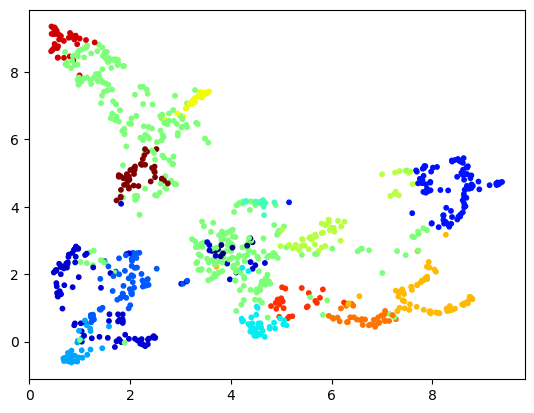

In [47]:
plt.scatter(x_clusters[:,0],x_clusters[:,1],s=10,c=stateSet,cmap=plt.cm.jet)

In [48]:
dx_clusters=model.get_avdx_clusters(x_clusters,Tmatrix)

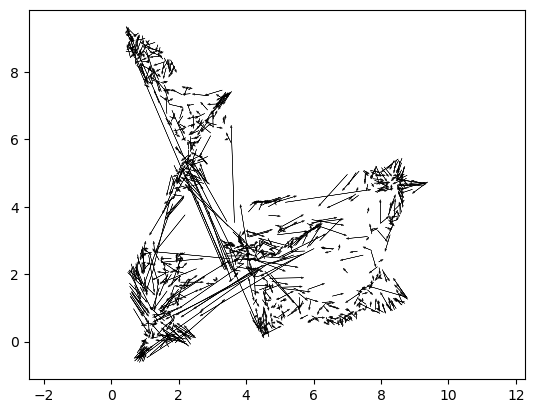

In [49]:
plot_dx_arrows(x_clusters,dx_clusters)

In [50]:
print(f'basis: {x_clusters[0,0]:2f},{x_clusters[0,1]:2f} target {x_clusters[971,0]:2f},{x_clusters[971,1]:2f}')

basis: 0.439789,9.345633 target 4.494346,0.173826


In [16]:
def plot_dx_arrows(x_clusters,dx_clusters):
    plt.figure()
    ax=plt.gca()
    for ic in range(dx_clusters.shape[0]):
        ax.arrow(x_clusters[ic,0],x_clusters[ic,1],dx_clusters[ic,0],dx_clusters[ic,1],head_width=.05,linewidth=.3,color='black',alpha=1.0)
    plt.axis('equal')
    plt.pause(1)

In [53]:
def get_committor(Tmatrix,indTargets,indSource,conv=1.e-3):
    Mt=Tmatrix.copy()
    nBins=Tmatrix.shape[0]
    sinkBins=indSource #np.where(avBinPnoColor==0.0)
    nsB=np.shape(sinkBins)
    nsB=nsB[0]
    for ii in sinkBins:
        Mt[ii,:]=np.zeros((1,nBins))
        Mt[ii,ii]=1.0
    q=np.zeros((nBins,1))
    q[indTargets,0]=1.0
    dconv=100.0
    qp=np.ones_like(q)
    while dconv>conv:
        q[indTargets,0]=1.0
        q[indSource,0]=0.0
        q=np.matmul(Mt,q)
        dconv=np.sum(np.abs(qp-q))
        print('convergence: '+str(dconv)+'\n')
        qp=q.copy()
    q[indTargets,0]=1.0
    q[indSource,0]=0.0
    return q

In [54]:
indTargets=[0]
indSource=[971]
q=get_committor(Tmatrix,indTargets,indSource,conv=1.e-5)

convergence: 973.4929202198526

convergence: 7.504227108382472

convergence: 6.597913980309427

convergence: 5.86912033961484

convergence: 5.30967131778129

convergence: 4.884530882348369

convergence: 4.533684627933893

convergence: 4.237308282369685

convergence: 3.979787276530918

convergence: 3.7509795186438657

convergence: 3.5443930628963165

convergence: 3.3557221606097376

convergence: 3.182019475586984

convergence: 3.0211768034545323

convergence: 2.871616803666485

convergence: 2.7321088937633147

convergence: 2.6016571191337823

convergence: 2.479430695593577

convergence: 2.3647198366279034

convergence: 2.256906825994821

convergence: 2.155446466783726

convergence: 2.0598524257997974

convergence: 1.969687375922213

convergence: 1.8845556484094923

convergence: 1.8040975879318721

convergence: 1.7279850934955865

convergence: 1.6559180069996438

convergence: 1.5876211231491275

convergence: 1.5228416660975983

convergence: 1.461347124970523

convergence: 1.4029233715729

convergence: 4.6110232300485994e-05

convergence: 4.608959571192537e-05

convergence: 4.6068968359461506e-05

convergence: 4.604835023805658e-05

convergence: 4.6027741345081154e-05

convergence: 4.600714167531223e-05

convergence: 4.598655122523736e-05

convergence: 4.596596998953504e-05

convergence: 4.594539796630323e-05

convergence: 4.5924835148692365e-05

convergence: 4.590428153223486e-05

convergence: 4.588373711830746e-05

convergence: 4.586320189782965e-05

convergence: 4.5842675866107905e-05

convergence: 4.582215902173925e-05

convergence: 4.580165135924954e-05

convergence: 4.578115287814285e-05

convergence: 4.576066356706242e-05

convergence: 4.5740183428584475e-05

convergence: 4.5719712454375085e-05

convergence: 4.5699250643494014e-05

convergence: 4.56787979878539e-05

convergence: 4.5658354487326146e-05

convergence: 4.563792013516884e-05

convergence: 4.561749493005577e-05

convergence: 4.55970788646573e-05

convergence: 4.55766719364333e-05

convergence: 4.5556274

convergence: 3.442282854444923e-05

convergence: 3.440742264239142e-05

convergence: 3.4392023635613295e-05

convergence: 3.4376631521035936e-05

convergence: 3.436124629329839e-05

convergence: 3.434586795030098e-05

convergence: 3.4330496493774125e-05

convergence: 3.431513191214456e-05

convergence: 3.4299774208380834e-05

convergence: 3.4284423379663914e-05

convergence: 3.426907941996792e-05

convergence: 3.425374232748822e-05

convergence: 3.4238412099943505e-05

convergence: 3.4223088732219456e-05

convergence: 3.4207772223427855e-05

convergence: 3.419246256691804e-05

convergence: 3.417715976392181e-05

convergence: 3.4161863810504415e-05

convergence: 3.414657470201897e-05

convergence: 3.41312924375054e-05

convergence: 3.4116017008052325e-05

convergence: 3.410074841942855e-05

convergence: 3.4085486663236656e-05

convergence: 3.407023174026782e-05

convergence: 3.4054983640709916e-05

convergence: 3.403974236879936e-05

convergence: 3.402450791536589e-05

convergence: 3.40

In [55]:
plt.figure(figsize=(9,6))
plt.contourf(xx,yy,prob.T,levels=levels,cmap=plt.cm.gray_r,alpha=0.8)
plt.scatter(x_clusters[:,0],x_clusters[:,1],s=100,c=q,cmap=plt.cm.gist_heat,marker='o',vmin=0.,vmax=1.)
plt.title(tmSet[i])
cbar=plt.colorbar()
cbar.set_label('committor')
plt.pause(1)

NameError: name 'xx' is not defined

<Figure size 900x600 with 0 Axes>

In [62]:
prob,xedges1,yedges1=np.histogram2d(x_clusters[:,0],x_clusters[:,1],bins=20,weights=pSS)
#prob1=scipy.ndimage.gaussian_filter(prob1,sigma=sml)
xx,yy=np.meshgrid(.5*xedges1[1:]+.5*xedges1[0:-1],.5*yedges1[1:]+.5*yedges1[0:-1])

In [57]:
def get_steady_state_matrixpowers(Tmatrix,conv=1.e-3):
    max_iters=10000
    Mt=Tmatrix.copy()
    dconv=1.e100
    N=1
    pSS=np.mean(Mt,0)
    pSSp=np.ones_like(pSS)
    while dconv>conv and N<max_iters:
        Mt=np.matmul(Tmatrix,Mt)
        N=N+1
        if N%10 == 0:
            pSS=np.mean(Mt,0)
            pSS=pSS/np.sum(pSS)
            dconv=np.sum(np.abs(pSS-pSSp))
            pSSp=pSS.copy()
            print('N='+str(N)+' dconv: '+str(dconv)+'\n')
    return pSS

In [58]:
pSS=get_steady_state_matrixpowers(Tmatrix,conv=1.e-6)

N=10 dconv: 981.0

N=20 dconv: 0.20786489144378584

N=30 dconv: 0.15826093552476916

N=40 dconv: 0.12893332943600244

N=50 dconv: 0.10542591701235594

N=60 dconv: 0.08593859176293718

N=70 dconv: 0.07075877123473029

N=80 dconv: 0.05848134618445292

N=90 dconv: 0.04859921124372825

N=100 dconv: 0.04053089931757004

N=110 dconv: 0.03378054159185894

N=120 dconv: 0.028095454285308255

N=130 dconv: 0.023320987476665517

N=140 dconv: 0.019319071115719517

N=150 dconv: 0.01596777299968798

N=160 dconv: 0.0131733627510018

N=170 dconv: 0.010852506509442613

N=180 dconv: 0.008929584713627233

N=190 dconv: 0.007340196253817526

N=200 dconv: 0.006029110794836335

N=210 dconv: 0.004949245429700898

N=220 dconv: 0.004060907800035431

N=230 dconv: 0.003330830933915777

N=240 dconv: 0.0027314263947432137

N=250 dconv: 0.002239540745394528

N=260 dconv: 0.001835991760196728

N=270 dconv: 0.0015050195085752605

N=280 dconv: 0.0012336385967569006

N=290 dconv: 0.0010111617720735442

N=300 dconv: 0.000

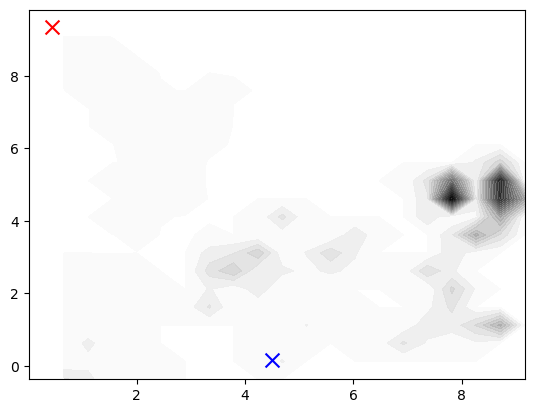

In [64]:
levels=np.linspace(np.min(prob[prob>0]),np.max(prob),20)
plt.contourf(xx,yy,prob.T,levels=levels,cmap=plt.cm.gray_r,alpha=0.8)
plt.scatter(x_clusters[indTargets,0],x_clusters[indTargets,1],s=100,c='red',marker='x')
plt.scatter(x_clusters[indSource,0],x_clusters[indSource,1],s=100,c='blue',marker='x')

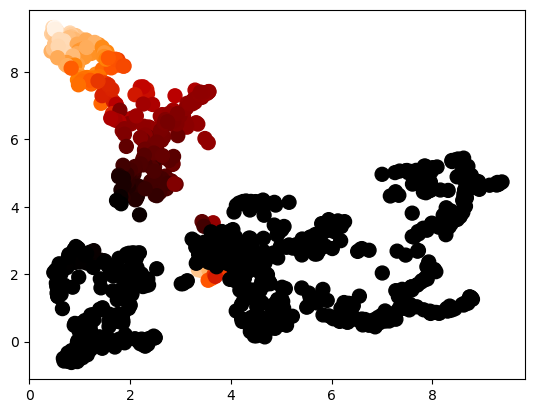

In [65]:
plt.scatter(x_clusters[:,0],x_clusters[:,1],s=100,c=q,cmap=plt.cm.gist_heat,marker='o',vmin=0.,vmax=1.)

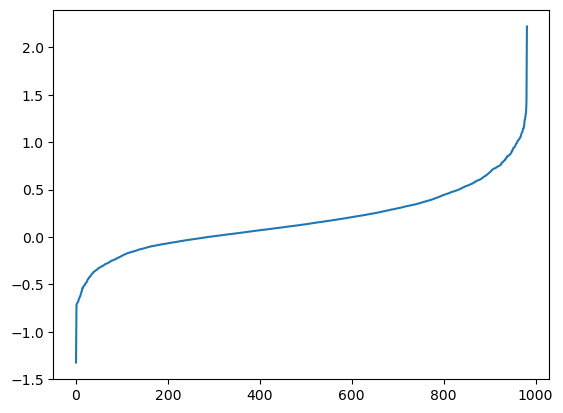

In [68]:
plt.plot(w)